# [Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/)

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images

The classes are:

| Label |	Description |
|-------|-------------|
| 0 |	T-shirt/top |
| 1 |	Trouser |
| 2 |	Pullover |
| 3 |	Dress |
| 4 |	Coat |
| 5 |	Sandal |
| 6 |	Shirt |
| 7 |	Sneaker |
| 8 |	Bag |
| 9 |	Ankle boot |

## Setup

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [3]:
# Model / data parameters
LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test_num) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test_num, num_classes)

4422102/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


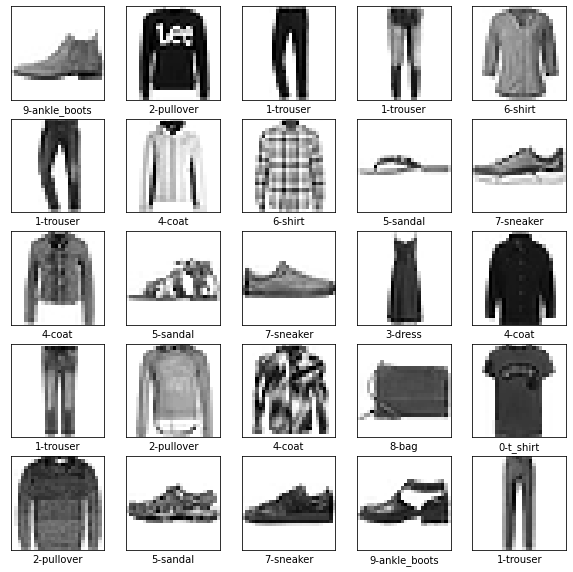

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i].reshape(img_rows, img_cols), cmap=plt.cm.binary)
    plt.xlabel(f'{y_test_num[i]}-{LABEL_NAMES[y_test_num[i]]}')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

## Build the model

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

## Train the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 44s 103ms/step - loss: 0.6863 - accuracy: 0.7534 - val_loss: 0.4380 - val_accuracy: 0.8472
Epoch 2/15
422/422 [==============================] - 48s 113ms/step - loss: 0.4488 - accuracy: 0.8386 - val_loss: 0.3874 - val_accuracy: 0.8627
Epoch 3/15
422/422 [==============================] - 47s 112ms/step - loss: 0.4001 - accuracy: 0.8574 - val_loss: 0.3571 - val_accuracy: 0.8702
Epoch 4/15
422/422 [==============================] - 45s 106ms/step - loss: 0.3714 - accuracy: 0.8680 - val_loss: 0.3316 - val_accuracy: 0.8802
Epoch 5/15
422/422 [==============================] - 44s 103ms/step - loss: 0.3479 - accuracy: 0.8762 - val_loss: 0.3185 - val_accuracy: 0.8838
Epoch 6/15
422/422 [==============================] - 43s 102ms/step - loss: 0.3336 - accuracy: 0.8805 - val_loss: 0.3045 - val_accuracy: 0.8870
Epoch 7/15
422/422 [==============================] - 43s 102ms/step - loss: 0.3191 - accuracy: 0.8847 - val_loss: 0.2949 - val_ac

## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])